In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns
sns.set()
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [2]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
y=pd.Categorical.from_codes(breast_cancer.target,breast_cancer.target_names)
y=pd.get_dummies(y, drop_first=True)

In [10]:
X = X[['worst area', 'worst smoothness']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
ass=accuracy_score(y_test, y_pred)
print('accuracy of the naive bayes classifier on the given breast cancer dataset is:',ass)

accuracy of the naive bayes classifier on the given breast cancer dataset is: 0.9090909090909091


C:\Users\blr0a\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [12]:
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix :\n",cm)

confusion matrix :
 [[44 11]
 [ 2 86]]


Text(89.18, 0.5, 'Predicted')

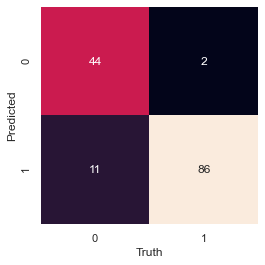

In [16]:
# Plot Confusion Matrix
mat = confusion_matrix(y_pred, y_test)
names = np.unique(y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [17]:
#Precision is the ability of a classiifer not to label an instance positive that is actually negative.
#Recall is the ability of a classifier to find all positive instances.
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0
#Support is the number of actual occurrences of the class in the specified dataset.
report = classification_report(y_test, y_pred)
print('classification report:\n',report)
breast_cancer.feature_names

classification report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87        55
           1       0.89      0.98      0.93        88

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

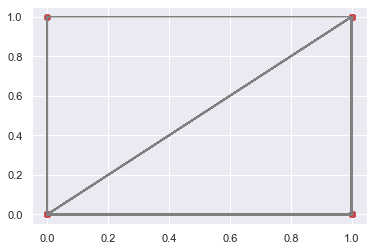

In [20]:
plt.plot(y_pred, y_test, 'or')
plt.plot(y_pred, y_test, '-', color='gray')